 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns = pd.read_csv('C:/Users/apala/BOOTCAMP/Starter_Code (1)/Starter_Code/Resources/whale_returns.csv', parse_dates = True, infer_datetime_format = True, index_col='Date')

In [3]:
#checking for nulls 
whale_returns.isnull()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,True,True,True,True
2015-03-03,False,False,False,False
2015-03-04,False,False,False,False
2015-03-05,False,False,False,False
2015-03-06,False,False,False,False
...,...,...,...,...
2019-04-25,False,False,False,False
2019-04-26,False,False,False,False
2019-04-29,False,False,False,False


In [4]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_returns = whale_returns.dropna()


In [6]:
whale_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [7]:
# Reading algorithmic returns
algo_returns = pd.read_csv('C:/Users/apala/BOOTCAMP/Starter_Code (1)/Starter_Code/Resources/algo_returns.csv', parse_dates = True, infer_datetime_format = True, index_col='Date')

In [8]:
#checking for nulls 

algo_returns.isnull()

,Algo 1,Algo 2
Date,,
2014-05-28,False,True
2014-05-29,False,True
2014-05-30,False,True
2014-06-02,False,True
2014-06-03,False,True
...,...,...
2019-04-25,False,False
2019-04-26,False,False
2019-04-29,False,False


In [9]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [10]:
# Drop nulls
algo_returns = algo_returns.dropna()


In [11]:
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [12]:
algo_returns

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [13]:
algo_returns.columns

Index(['Algo 1', 'Algo 2'], dtype='object')

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [14]:
# Reading S&P 500 Closing Prices
sp500 = pd.read_csv('C:/Users/apala/BOOTCAMP/Starter_Code (1)/Starter_Code/Resources/sp500_history.csv', parse_dates = True, infer_datetime_format = True, index_col='Date')

In [15]:
sp500

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06
...,...
2012-10-05,$1460.93
2012-10-04,$1461.40
2012-10-03,$1450.99


In [16]:
# Removing $ signs - Re-ran code and produced an error, you can see below that $ signs were removed 
sp500["Close"] = sp500["Close"].str.replace("$", "")



C:\Users\apala\AppData\Local\Temp\ipykernel_9932\4228020786.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500["Close"] = sp500["Close"].str.replace("$", "")


In [17]:
# Check Data Types
sp500.dtypes

Close    object
dtype: object

In [18]:
sp500['Close']

Date
2019-04-23    2933.68
2019-04-22    2907.97
2019-04-18    2905.03
2019-04-17    2900.45
2019-04-16    2907.06
               ...   
2012-10-05    1460.93
2012-10-04    1461.40
2012-10-03    1450.99
2012-10-02    1445.75
2012-10-01    1444.49
Name: Close, Length: 1649, dtype: object

In [19]:
# Fix Data Types 
sp500['Close'] = sp500['Close'].astype('float')

In [20]:
sp500['Close']

Date
2019-04-23    2933.68
2019-04-22    2907.97
2019-04-18    2905.03
2019-04-17    2900.45
2019-04-16    2907.06
               ...   
2012-10-05    1460.93
2012-10-04    1461.40
2012-10-03    1450.99
2012-10-02    1445.75
2012-10-01    1444.49
Name: Close, Length: 1649, dtype: float64

In [21]:
# Calculate Daily Returns
sp500['Close'] = sp500['Close'].pct_change()

In [22]:
sp500

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [23]:
sp500.isnull()

,Close
Date,
2019-04-23,True
2019-04-22,False
2019-04-18,False
2019-04-17,False
2019-04-16,False
...,...
2012-10-05,False
2012-10-04,False
2012-10-03,False


In [24]:
# Drop nulls
sp500 = sp500.dropna().copy()

In [25]:
sp500.isnull().sum()

Close    0
dtype: int64

In [26]:
sp500.isnull().sum()

Close    0
dtype: int64

In [27]:
sp500

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [28]:
# Rename `Close` Column to be specific to this portfolio.
sp500 = sp500.rename(columns = {'Close': 'sp_close'})

In [29]:
sp500 = sp500.astype('float')

In [30]:
sp500.dtypes

sp_close    float64
dtype: object

In [31]:
sp500.isnull()

,sp_close
Date,
2019-04-22,False
2019-04-18,False
2019-04-17,False
2019-04-16,False
2019-04-15,False
...,...
2012-10-05,False
2012-10-04,False
2012-10-03,False


In [32]:
sp500

,sp_close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [33]:
sp500.columns

Index(['sp_close'], dtype='object')

## Combine Whale, Algorithmic, and S&P 500 Returns

In [34]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
wasp_returns = pd.concat([whale_returns,algo_returns,sp500], axis = 1, join = 'inner')

#Why did my DF show NaN values until I set axis = 1? Thanks 

In [35]:
wasp_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp_close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577


In [36]:
wasp_returns['BERKSHIRE HATHAWAY INC']

Date
2015-03-03   -0.006569
2015-03-04    0.004213
2015-03-05    0.006726
2015-03-06   -0.013098
2015-03-09   -0.001652
                ...   
2019-04-15   -0.010492
2019-04-16    0.000837
2019-04-17    0.003222
2019-04-18    0.001916
2019-04-22   -0.001088
Name: BERKSHIRE HATHAWAY INC, Length: 1042, dtype: float64

In [37]:
wasp_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
sp_close                       0
dtype: int64

In [38]:
wasp_returns.rename(columns = {'PAULSON & CO.INC.': 'Paulson'})

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp_close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'SOROS FUND MANAGEMENT LLC'}, xlabel='Date'>

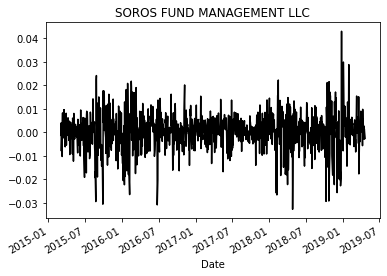

In [39]:
# Plot daily returns of all portfolios - UNSUIRE AS TO WHETHER IT WANTED ONE GRAPH OR MULTIPLE GRAPHS 
# for some reason I am unable to extract Paulson & CO INC column 

wasp_returns['SOROS FUND MANAGEMENT LLC'].plot(title = 'SOROS FUND MANAGEMENT LLC', color = 'black')


<AxesSubplot:title={'center':'TIGER GLOBAL MANAGEMENT LLC'}, xlabel='Date'>

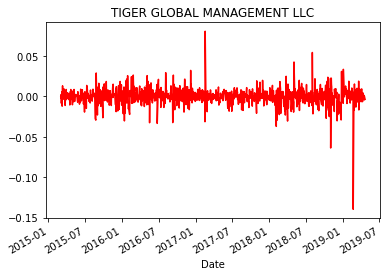

In [40]:
wasp_returns['TIGER GLOBAL MANAGEMENT LLC'].plot(title = 'TIGER GLOBAL MANAGEMENT LLC', color = 'red')

<AxesSubplot:title={'center':'BERKSHIRE HATHAWAY INC'}, xlabel='Date'>

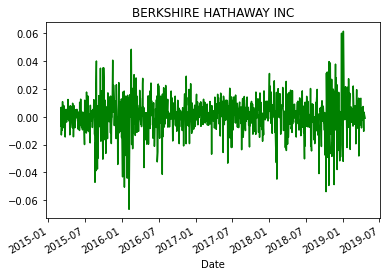

In [41]:
wasp_returns['BERKSHIRE HATHAWAY INC'].plot(title ='BERKSHIRE HATHAWAY INC', color = 'green' )

<AxesSubplot:title={'center':'Algo 1'}, xlabel='Date'>

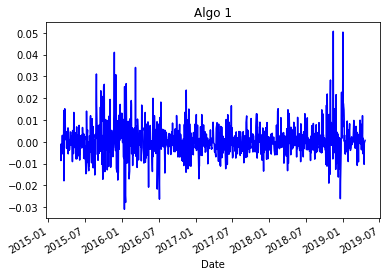

In [42]:
wasp_returns['Algo 1'].plot(title ='Algo 1', color = 'blue')

<AxesSubplot:title={'center':'Algo 2'}, xlabel='Date'>

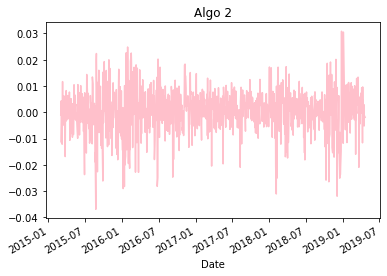

In [43]:
wasp_returns['Algo 2'].plot(title = 'Algo 2', color = 'pink')

<AxesSubplot:title={'center':'sp_close'}, xlabel='Date'>

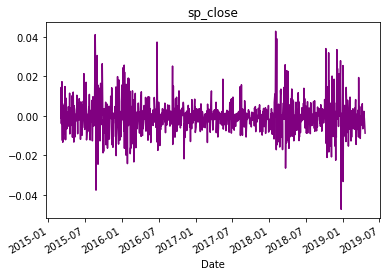

In [44]:
wasp_returns['sp_close'].plot(title = 'sp_close', color = 'purple')


# Berkshire Hathaway and Algo 1 seem to have beaten S&P

#### Calculate and Plot cumulative returns.

In [45]:
# Calculate cumulative returns of all portfolios

# Plot cumulative returns

<AxesSubplot:title={'center':'SOROS FUND MANAGEMENT LLC Cumulative Return'}, xlabel='Date'>

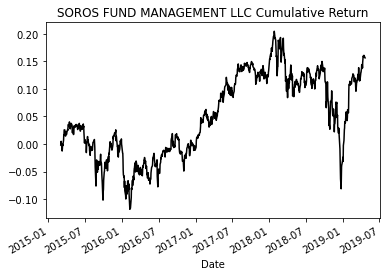

In [46]:
soros_cum_r = (1+ wasp_returns['SOROS FUND MANAGEMENT LLC']).cumprod() -1

soros_cum_r.plot(title = 'SOROS FUND MANAGEMENT LLC Cumulative Return', color = 'black')

<AxesSubplot:title={'center':'TIGER GLOBAL MANAGEMENT LLC'}, xlabel='Date'>

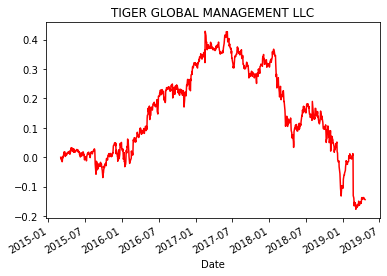

In [47]:
tiger_cum_r = (1+ wasp_returns['TIGER GLOBAL MANAGEMENT LLC']).cumprod() -1

tiger_cum_r.plot(title = 'TIGER GLOBAL MANAGEMENT LLC', color = 'red')



<AxesSubplot:title={'center':'BERKSHIRE HATHAWAY INC'}, xlabel='Date'>

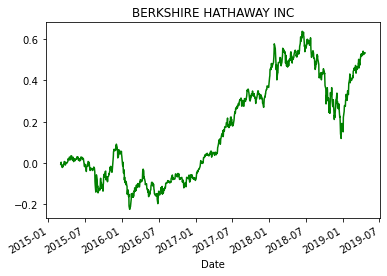

In [48]:
bh_cum_r = (1+ wasp_returns['BERKSHIRE HATHAWAY INC']).cumprod() -1

bh_cum_r.plot(title ='BERKSHIRE HATHAWAY INC', color = 'green' )

<AxesSubplot:title={'center':'Algo 1'}, xlabel='Date'>

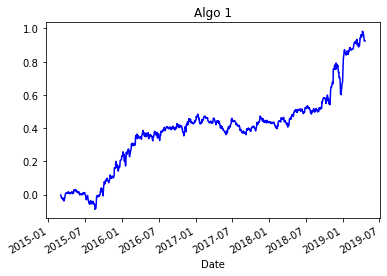

In [49]:
algo_1_cum_r = (1+ wasp_returns['Algo 1']).cumprod() -1

algo_1_cum_r.plot(title ='Algo 1', color = 'blue')

<AxesSubplot:title={'center':'Algo 2'}, xlabel='Date'>

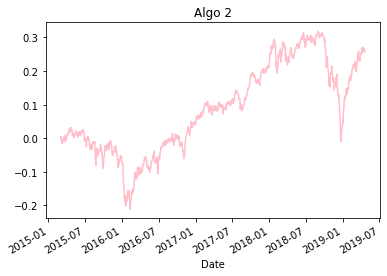

In [50]:
algo_2_cum_r = (1+ wasp_returns['Algo 2']).cumprod() -1

algo_2_cum_r.plot(title = 'Algo 2', color = 'pink')

<AxesSubplot:title={'center':'sp_close'}, xlabel='Date'>

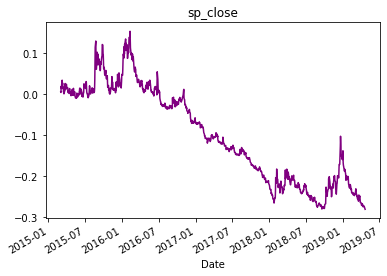

In [51]:
sp500_cum_r = (1+ wasp_returns['sp_close']).cumprod() -1

sp500_cum_r.plot(title = 'sp_close', color = 'purple')

In [52]:
# virtually all funds beat the S&P 500 except for Tiger Global management 

In [53]:
## Risk Analysis

# Determine the _risk_ of each portfolio:

# 1. Create a box plot for each portfolio. 
# 2. Calculate the standard deviation for all portfolios
# 4. Determine which portfolios are riskier than the S&P 500
# 5. Calculate the Annualized Standard Deviation

# 1. Creating box (Correlation matrix? for all portfolios)


In [54]:
wasp_returns.corr()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp_close
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
sp_close,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


<AxesSubplot:>

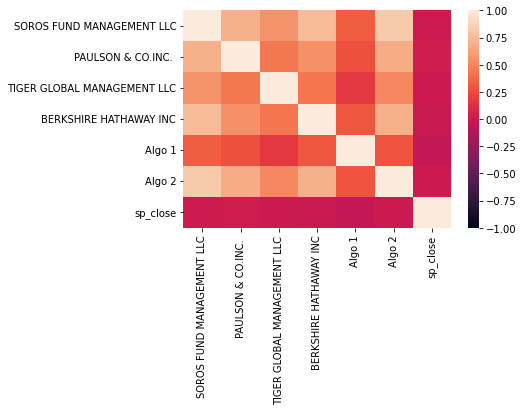

In [55]:
import seaborn as sns 
sns.heatmap(wasp_returns.corr(), vmin = -1,vmax = 1)

# 2. Calculate the standard deviation for all portfolios

In [56]:
wasp_returns['SOROS FUND MANAGEMENT LLC'].std()

0.007896188745252348

In [57]:
wasp_returns['TIGER GLOBAL MANAGEMENT LLC'].std()

0.010897305414583355

In [58]:
wasp_returns['BERKSHIRE HATHAWAY INC'].std()

0.012918753062201797

In [59]:
wasp_returns['Algo 1'].std()

0.007622690854822048

In [60]:
wasp_returns['Algo 2'].std()

0.008341234467834717

In [61]:
wasp_returns['sp_close'].std()

0.00858688974707399

## Annualized std dev

In [62]:
import numpy as np 

In [63]:
wasp_returns['SOROS FUND MANAGEMENT LLC'].std()*np.sqrt(225)

0.11844283117878522

In [64]:
wasp_returns['TIGER GLOBAL MANAGEMENT LLC'].std()*np.sqrt(225)

0.16345958121875032

In [65]:
wasp_returns['BERKSHIRE HATHAWAY INC'].std()*np.sqrt(225)

0.19378129593302695

In [66]:
wasp_returns['Algo 1'].std()*np.sqrt(225)

0.11434036282233072

In [67]:
wasp_returns['Algo 2'].std()*np.sqrt(225)

0.12511851701752075

In [68]:
wasp_returns['sp_close'].std()*np.sqrt(225)

0.12880334620610984

# Determine which portfolios are riskier than S&P 

In [69]:
soros = wasp_returns['SOROS FUND MANAGEMENT LLC'].std()*np.sqrt(225)
tiger = wasp_returns['TIGER GLOBAL MANAGEMENT LLC'].std()*np.sqrt(225)
bh = wasp_returns['BERKSHIRE HATHAWAY INC'].std()*np.sqrt(225)
algo_1 = wasp_returns['Algo 1'].std()*np.sqrt(225)
algo_2 = wasp_returns['Algo 2'].std()*np.sqrt(225)
sp_close = wasp_returns['sp_close'].std()*np.sqrt(225)

In [70]:
# 4. Determine which portfolios are riskier than the S&P 500

if soros > sp_close:
    print('Soros is riskier than S&P')
else: 
    print('Soros is less risky than S&P')
#    
if tiger > sp_close:
    print('Tiger is riskier than S&P')
else: 
    print('Tiger is less risky than S&P')
 #   
if bh > sp_close:
    print('Berkshire Hathaway is riskier than S&P')
else: 
    print('Berkshire Hathaway is less risky than S&P')
 #   
if algo_1 > sp_close:
    print('Algo 1 is riskier than S&P')
else: 
    print('Algo 1 is less risky than S&P')
#    
if algo_2 > sp_close:
    print('Algo 2 is riskier than S&P')
else: 
    print('Algo 2 is less risky than S&P')

Soros is less risky than S&P
Tiger is riskier than S&P
Berkshire Hathaway is riskier than S&P
Algo 1 is less risky than S&P
Algo 2 is less risky than S&P


---

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

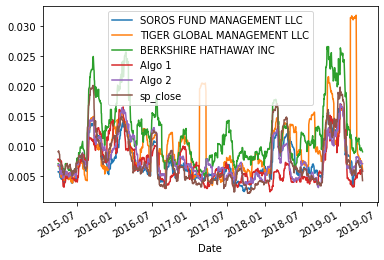

In [71]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

soros_std = wasp_returns['SOROS FUND MANAGEMENT LLC'].rolling(window = 21).std()
tiger_std = wasp_returns['TIGER GLOBAL MANAGEMENT LLC'].rolling(window = 21).std()
bh_std = wasp_returns['BERKSHIRE HATHAWAY INC'].rolling(window = 21).std()
algo_1_std = wasp_returns['Algo 1'].rolling(window = 21).std()
algo_2_std = wasp_returns['Algo 2'].rolling(window = 21).std()
sp_close_std = wasp_returns['sp_close'].rolling(window = 21).std()


# Plot the rolling standard deviation - HOW DO I ADD A LEGEND? 
soros_std.plot(legend = 'Soros')
tiger_std.plot(legend = 'Tiger')
bh_std.plot(legend = 'BH')
algo_1_std.plot(legend = 'Algo 1')
algo_2_std.plot(legend = 'Algo 2')
sp_close_std.plot(legend = 'S&P')

# Calculate and plot the correlation

<AxesSubplot:>

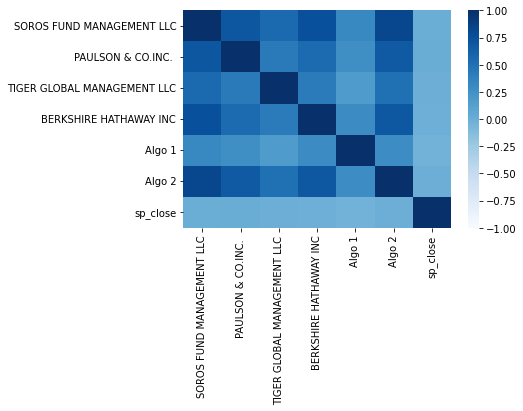

In [72]:
import seaborn as sns

# Calculate the correlation
wasp_corr = wasp_returns.corr()

# Display de correlation matrix
sns.heatmap(wasp_corr, vmin=-1, vmax=1, cmap = 'Blues')

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:xlabel='Date'>

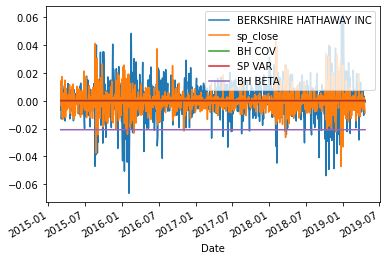

In [73]:
# Calculate covariance of a single portfolio
bh_sp_ret = pd.concat([wasp_returns['BERKSHIRE HATHAWAY INC'], wasp_returns['sp_close']], axis = 1, join = 'inner')
bh_sp_ret
bh_sp_ret['BH COV'] = bh_sp_ret['BERKSHIRE HATHAWAY INC'].cov(bh_sp_ret['sp_close'])
bh_sp_ret
# Calculate variance of S&P 500
bh_sp_ret['SP VAR'] = bh_sp_ret['sp_close'].var()
bh_sp_ret
# Computing beta
bh_sp_ret['BH BETA'] = bh_sp_ret['BH COV']/bh_sp_ret['SP VAR']

bh_sp_ret.plot()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [74]:
# Use `ewm` to calculate the rolling window

wasp_returns.ewm(halflife=21).std()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp_close
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380,0.003962
2015-03-05,0.002677,0.004968,0.002478,0.007020,0.004162,0.002662,0.007961
2015-03-06,0.005349,0.004615,0.004665,0.009387,0.003419,0.007166,0.008178
2015-03-09,0.004638,0.004471,0.005496,0.008066,0.002999,0.006290,0.009475
...,...,...,...,...,...,...,...
2019-04-15,0.007755,0.006960,0.016572,0.012136,0.006880,0.008065,0.007823
2019-04-16,0.007632,0.006846,0.016301,0.011939,0.006922,0.007938,0.007721
2019-04-17,0.007547,0.006846,0.016047,0.011746,0.007097,0.007896,0.007595


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [75]:
# Annualized Sharpe Ratios (using Rf rate as 10Y T-bill with yield of 2.958)
rf_rate = 0.010
wasp_sharpe = ((wasp_returns.mean() - rf_rate)*252 ) \
                                                / (wasp_returns.std()*np.sqrt(252))
wasp_sharpe_df = pd.DataFrame(wasp_sharpe)

wasp_sharpe_df

,0
SOROS FUND MANAGEMENT LLC,-19.761119
PAULSON & CO.INC.,-23.086929
TIGER GLOBAL MANAGEMENT LLC,-14.697556
BERKSHIRE HATHAWAY INC,-11.681214
Algo 1,-19.455744
Algo 2,-18.547031
sp_close,-19.005495


In [76]:
wasp_sharpe_df = wasp_sharpe_df.rename({0:'Sharpe Ratio'}, axis=1)
wasp_sharpe_df

,Sharpe Ratio
SOROS FUND MANAGEMENT LLC,-19.761119
PAULSON & CO.INC.,-23.086929
TIGER GLOBAL MANAGEMENT LLC,-14.697556
BERKSHIRE HATHAWAY INC,-11.681214
Algo 1,-19.455744
Algo 2,-18.547031
sp_close,-19.005495


array([[<AxesSubplot:title={'center':'Sharpe Ratio'}>]], dtype=object)

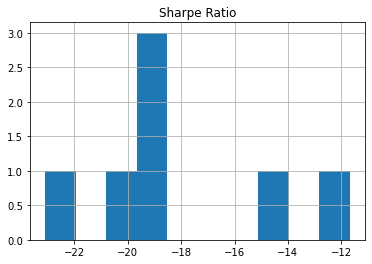

In [77]:
# Visualize the sharpe ratios as a bar plot
wasp_sharpe_df.hist()

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [78]:
# Reading data from 1st stock
aapl = pd.read_csv('C:/Users/apala/BOOTCAMP/Starter_Code (1)/Starter_Code/Resources/aapl_historical.csv', parse_dates = True, infer_datetime_format = True, index_col='Trade DATE')

aapl = aapl.rename(columns ={'NOCP':'NOCP_AAPL', 'Symbol':'AAPL'})

aapl

,AAPL,NOCP_AAPL
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75
...,...,...
2018-05-17,AAPL,186.99
2018-05-16,AAPL,188.18
2018-05-15,AAPL,186.44


In [79]:
# Reading data from 2nd stock
cost = pd.read_csv('C:/Users/apala/BOOTCAMP/Starter_Code (1)/Starter_Code/Resources/cost_historical.csv', parse_dates = True, infer_datetime_format = True, index_col='Trade DATE')

cost = cost.rename(columns ={'NOCP':'NOCP_COST', 'Symbol':'COST'})
cost

,COST,NOCP_COST
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62
...,...,...
2018-05-17,COST,199.60
2018-05-16,COST,198.71
2018-05-15,COST,195.48


In [80]:
# Reading data from 3rd stock
goog = pd.read_csv('C:/Users/apala/BOOTCAMP/Starter_Code (1)/Starter_Code/Resources/goog_historical.csv', parse_dates = True, infer_datetime_format = True, index_col='Trade DATE')
goog = goog.rename(columns ={'NOCP':'NOCP_GOOG', 'Symbol':'GOOG'})
goog

,GOOG,NOCP_GOOG
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40
...,...,...
2018-05-17,GOOG,1078.59
2018-05-16,GOOG,1081.77
2018-05-15,GOOG,1079.23


In [81]:
# Combine all stocks in a single DataFrame
portfolio = pd.concat([aapl,cost,goog],axis=1,join='inner')
portfolio

,AAPL,NOCP_AAPL,COST,NOCP_COST,GOOG,NOCP_GOOG
Trade DATE,,,,,,
2019-05-09,AAPL,200.72,COST,243.47,GOOG,1162.38
2019-05-08,AAPL,202.90,COST,241.34,GOOG,1166.27
2019-05-07,AAPL,202.86,COST,240.18,GOOG,1174.10
2019-05-06,AAPL,208.48,COST,244.23,GOOG,1189.39
2019-05-03,AAPL,211.75,COST,244.62,GOOG,1185.40
...,...,...,...,...,...,...
2018-05-17,AAPL,186.99,COST,199.60,GOOG,1078.59
2018-05-16,AAPL,188.18,COST,198.71,GOOG,1081.77
2018-05-15,AAPL,186.44,COST,195.48,GOOG,1079.23


In [82]:
# Reset Date index
#set_index = 'Trade DATE' - Done in importing section of initial stocks 

In [83]:
# Reorganize portfolio data by having a column per symbol
# Done in initial dataframe strucute of inidividual stocks - goog = goog.rename(columns ={'NOCP':'NOCP_COST', 'Symbol':'GOOG'})

In [84]:
# Calculate daily returns
portfolio['NOCP_AAPL'] = portfolio['NOCP_AAPL'].pct_change()
portfolio['NOCP_COST'] = portfolio['NOCP_COST'].pct_change()
portfolio['NOCP_GOOG'] = portfolio['NOCP_GOOG'].pct_change()
# Drop NAs
portfolio = portfolio.dropna()
# Display sample data
portfolio

,AAPL,NOCP_AAPL,COST,NOCP_COST,GOOG,NOCP_GOOG
Trade DATE,,,,,,
2019-05-08,AAPL,0.010861,COST,-0.008749,GOOG,0.003347
2019-05-07,AAPL,-0.000197,COST,-0.004806,GOOG,0.006714
2019-05-06,AAPL,0.027704,COST,0.016862,GOOG,0.013023
2019-05-03,AAPL,0.015685,COST,0.001597,GOOG,-0.003355
2019-05-02,AAPL,-0.012279,COST,-0.007890,GOOG,-0.019226
...,...,...,...,...,...,...
2018-05-17,AAPL,0.003650,COST,0.003217,GOOG,0.011469
2018-05-16,AAPL,0.006364,COST,-0.004459,GOOG,0.002948
2018-05-15,AAPL,-0.009246,COST,-0.016255,GOOG,-0.002348


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [85]:
# Set weights
weight = 1/3 

# Calculate portfolio return
portfolio['Weight_ret_AAPL'] = portfolio['NOCP_AAPL']*weight
portfolio['Weight_ret_GOOG'] = portfolio['NOCP_GOOG']*weight
portfolio['Weight_ret_COST'] = portfolio['NOCP_COST']*weight

# Display sample data
portfolio


#HOW CAN IT BE DONE MORE EFFICIENTLY? - I COULD'VE DROPPED 'SYMBOLS' COLUMNS AND RENAME NOCP 
# TO AAPL RETURNS THAT WOULD'VE MATCHED SHAPE OF df

C:\Users\apala\AppData\Local\Temp\ipykernel_9932\4248193088.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  portfolio['Weight_ret_AAPL'] = portfolio['NOCP_AAPL']*weight
C:\Users\apala\AppData\Local\Temp\ipykernel_9932\4248193088.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  portfolio['Weight_ret_GOOG'] = portfolio['NOCP_GOOG']*weight
C:\Users\apala\AppData\Local\Temp\ipykernel_9932\4248193088.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

,AAPL,NOCP_AAPL,COST,NOCP_COST,GOOG,NOCP_GOOG,Weight_ret_AAPL,Weight_ret_GOOG,Weight_ret_COST
Trade DATE,,,,,,,,,
2019-05-08,AAPL,0.010861,COST,-0.008749,GOOG,0.003347,0.003620,0.001116,-0.002916
2019-05-07,AAPL,-0.000197,COST,-0.004806,GOOG,0.006714,-0.000066,0.002238,-0.001602
2019-05-06,AAPL,0.027704,COST,0.016862,GOOG,0.013023,0.009235,0.004341,0.005621
2019-05-03,AAPL,0.015685,COST,0.001597,GOOG,-0.003355,0.005228,-0.001118,0.000532
2019-05-02,AAPL,-0.012279,COST,-0.007890,GOOG,-0.019226,-0.004093,-0.006409,-0.002630
...,...,...,...,...,...,...,...,...,...
2018-05-17,AAPL,0.003650,COST,0.003217,GOOG,0.011469,0.001217,0.003823,0.001072
2018-05-16,AAPL,0.006364,COST,-0.004459,GOOG,0.002948,0.002121,0.000983,-0.001486
2018-05-15,AAPL,-0.009246,COST,-0.016255,GOOG,-0.002348,-0.003082,-0.000783,-0.005418


In [ ]:
# Join your returns DataFrame to the original returns DataFrame
# already created in step 1 

In [94]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
portfolio.dropna()

portfolio

,AAPL,NOCP_AAPL,COST,NOCP_COST,GOOG,NOCP_GOOG,Weight_ret_AAPL,Weight_ret_GOOG,Weight_ret_COST
Trade DATE,,,,,,,,,
2019-05-08,AAPL,0.010861,COST,-0.008749,GOOG,0.003347,0.003620,0.001116,-0.002916
2019-05-07,AAPL,-0.000197,COST,-0.004806,GOOG,0.006714,-0.000066,0.002238,-0.001602
2019-05-06,AAPL,0.027704,COST,0.016862,GOOG,0.013023,0.009235,0.004341,0.005621
2019-05-03,AAPL,0.015685,COST,0.001597,GOOG,-0.003355,0.005228,-0.001118,0.000532
2019-05-02,AAPL,-0.012279,COST,-0.007890,GOOG,-0.019226,-0.004093,-0.006409,-0.002630
...,...,...,...,...,...,...,...,...,...
2018-05-17,AAPL,0.003650,COST,0.003217,GOOG,0.011469,0.001217,0.003823,0.001072
2018-05-16,AAPL,0.006364,COST,-0.004459,GOOG,0.002948,0.002121,0.000983,-0.001486
2018-05-15,AAPL,-0.009246,COST,-0.016255,GOOG,-0.002348,-0.003082,-0.000783,-0.005418


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [87]:
# Calculate the annualized `std`
portfolio.std()

C:\Users\apala\AppData\Local\Temp\ipykernel_9932\3558468838.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  portfolio.std()


NOCP_AAPL          0.018923
NOCP_COST          0.013439
NOCP_GOOG          0.016714
Weight_ret_AAPL    0.006308
Weight_ret_GOOG    0.005571
Weight_ret_COST    0.004480
dtype: float64

### Calculate and plot rolling `std` with 21-day window

C:\Users\apala\AppData\Local\Temp\ipykernel_9932\2448709439.py:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['AAPL', 'COST', 'GOOG'], dtype='object')
  portfolio_risk = portfolio.ewm(halflife=21).std()


<AxesSubplot:title={'center':'Portfolio Risk'}, xlabel='Trade DATE'>

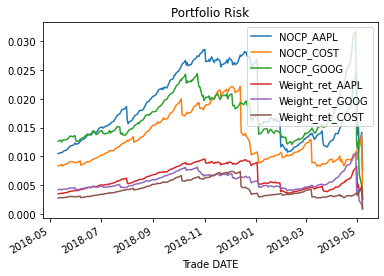

In [88]:
# Calculate rolling standard deviation
portfolio_risk = portfolio.ewm(halflife=21).std()
portfolio_risk.dropna()
# Plot rolling standard deviation
portfolio_risk.plot(title = 'Portfolio Risk')

### Calculate and plot the correlation

<AxesSubplot:>

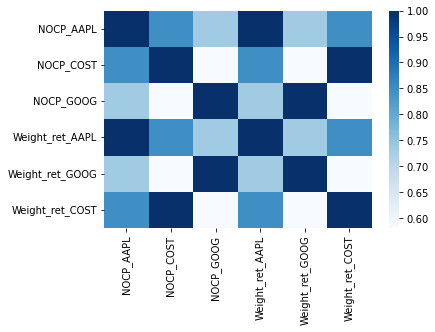

In [89]:
# Calculate and plot the correlation
portfolio_risk
portfolio.dropna()
portfolio_corr = portfolio_risk.corr()
sns.heatmap(portfolio_corr, cmap='Blues')

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [120]:

portfolio = portfolio.drop('COST', axis=1)

In [134]:
# Calculate and plot Beta
portfolio['Overall Return'] = portfolio['Weight_ret_AAPL']+portfolio['Weight_ret_GOOG']+portfolio['Weight_ret_COST']

In [135]:
portfolio

,NOCP_AAPL,NOCP_COST,NOCP_GOOG,Weight_ret_AAPL,Weight_ret_GOOG,Weight_ret_COST,portfolio_cov,Overall Return
Trade DATE,,,,,,,,
2019-05-08,0.010861,-0.008749,0.003347,0.003620,0.001116,-0.002916,0.000138,0.001820
2019-05-07,-0.000197,-0.004806,0.006714,-0.000066,0.002238,-0.001602,0.000138,0.000570
2019-05-06,0.027704,0.016862,0.013023,0.009235,0.004341,0.005621,0.000138,0.019196
2019-05-03,0.015685,0.001597,-0.003355,0.005228,-0.001118,0.000532,0.000138,0.004642
2019-05-02,-0.012279,-0.007890,-0.019226,-0.004093,-0.006409,-0.002630,0.000138,-0.013131
...,...,...,...,...,...,...,...,...
2018-05-17,0.003650,0.003217,0.011469,0.001217,0.003823,0.001072,0.000138,0.006112
2018-05-16,0.006364,-0.004459,0.002948,0.002121,0.000983,-0.001486,0.000138,0.001618
2018-05-15,-0.009246,-0.016255,-0.002348,-0.003082,-0.000783,-0.005418,0.000138,-0.009283


In [136]:
portfolio['portfolio_cov'] = portfolio['Overall Return'].cov(bh_sp_ret['sp_close'])


<AxesSubplot:xlabel='Trade DATE'>

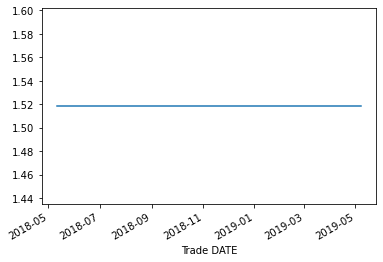

In [140]:
# Calculate variance of S&P 500
portfolio['SP VAR'] = bh_sp_ret['sp_close'].var()
portfolio
# Computing beta
portfolio['Portfolio BETA'] = portfolio['portfolio_cov']/portfolio['SP VAR']

portfolio['Portfolio BETA'].plot()

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [145]:
# Calculate Annualized Sharpe Ratios
rf_rate = 0.0010
portfolio['Portfolio_sharpe'] = ((portfolio['Overall Return'] - rf_rate)*252 ) \
                                                / (portfolio['Overall Return'].std()*np.sqrt(252))

portfolio

,NOCP_AAPL,NOCP_COST,NOCP_GOOG,Weight_ret_AAPL,Weight_ret_GOOG,Weight_ret_COST,portfolio_cov,Overall Return,SP VAR,Portfolio BETA,Portfolio_sharpe
Trade DATE,,,,,,,,,,,
2019-05-08,0.010861,-0.008749,0.003347,0.003620,0.001116,-0.002916,0.000112,0.001820,0.000074,1.518296,0.973707
2019-05-07,-0.000197,-0.004806,0.006714,-0.000066,0.002238,-0.001602,0.000112,0.000570,0.000074,1.518296,-0.510787
2019-05-06,0.027704,0.016862,0.013023,0.009235,0.004341,0.005621,0.000112,0.019196,0.000074,1.518296,21.616194
2019-05-03,0.015685,0.001597,-0.003355,0.005228,-0.001118,0.000532,0.000112,0.004642,0.000074,1.518296,4.326948
2019-05-02,-0.012279,-0.007890,-0.019226,-0.004093,-0.006409,-0.002630,0.000112,-0.013131,0.000074,1.518296,-16.787229
...,...,...,...,...,...,...,...,...,...,...,...
2018-05-17,0.003650,0.003217,0.011469,0.001217,0.003823,0.001072,0.000112,0.006112,0.000074,1.518296,6.072563
2018-05-16,0.006364,-0.004459,0.002948,0.002121,0.000983,-0.001486,0.000112,0.001618,0.000074,1.518296,0.733893
2018-05-15,-0.009246,-0.016255,-0.002348,-0.003082,-0.000783,-0.005418,0.000112,-0.009283,0.000074,1.518296,-12.215751


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!